In [2]:
%matplotlib inline
import os
import cv2
import numpy as np
import torch
from torch.autograd import Variable
import quat_math
import pickle

from PIL import Image
import scipy.io as scio
from functools import partial
from object_pose_utils.utils import to_np, to_var

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 20, 12
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [2]:
def imshowCV(img, axis = False, show = True):
    if not axis:
        plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if(show):
        plt.show()
    
def imshow(img, axis = False, colorbar = False, show = True):
    if not axis:
        plt.axis('off')
    plt.imshow(img)
    if(colorbar):
        plt.colorbar()
    if(show):
        plt.show()
    
def torch2Img(img, show = True):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    disp_img = to_np(img)
    if len(disp_img.shape) == 4:
        disp_img = disp_img[0]
    disp_img = disp_img.transpose((1,2,0))
    disp_img = disp_img * std + mean
    return disp_img
    
def imshowTorch(img, axis = False, show = True):
    if not axis:
        plt.axis('off')
    disp_img = torch2Img(img)
    plt.imshow(disp_img.astype(np.uint8))
    if(show):
        plt.show()

def plotImageScatter(img, choose, show = True):
    coords = np.unravel_index(choose, img.shape[:2])    
    plt.axis('off')
    plt.imshow(img.astype(np.uint8))    
    plt.scatter(coords[1], coords[0], 50)
    #plt.colorbar()
    if(show):
        plt.show()

In [20]:
dataset_root = '/ssd0/datasets/ycb/YCB_Video_Dataset'

classes = ['__background__']
with open(os.path.join(dataset_root, 'image_sets', 'classes.txt')) as f:
    classes.extend([x.rstrip('\n') for x in f.readlines()])


In [13]:
pcnn_data = np.load('results/posecnn_bing_comp.npz', allow_pickle=True) 
pcnn_err_compare=pcnn_data['err_compare'].item()
pcnn_lik_compare=pcnn_data['lik_compare'].item()
pcnn_err_bing=pcnn_data['err_bing'].item()
pcnn_lik_bing=pcnn_data['lik_bing'].item()

In [14]:
df_data = np.load('results/df_bing_comp.npz', allow_pickle=True)
df_err_compare=df_data['err_compare'].item()
df_lik_compare=df_data['lik_compare'].item()
df_err_bing=df_data['err_bing'].item()
df_lik_bing=df_data['lik_bing'].item()
df_err_bmm=df_data['err_bmm'].item()
df_lik_bmm=df_data['lik_bmm'].item()

In [32]:
print(' & Err$_{\theta sym}$ &  $\mathcal{L}$ & Err$_{\theta sym}$ &  $\mathcal{L}$ & Err$_{\theta sym}$ &  $\mathcal{L}$ & Err$_{\theta sym}$ &  $\mathcal{L}$ & Err$_{\theta sym}$ &  $\mathcal{L}$ \\\\')
print('\hline')
for obj in range(1, 22):
    mask = np.bitwise_not(np.bitwise_or(np.isnan(pcnn_err_bing[obj]), np.isnan(df_err_bing[obj])))
    print('{} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
        classes[obj].replace('_',' '),
        np.mean(np.array(pcnn_err_compare[obj])[mask]),
        np.mean(np.log(np.array(pcnn_lik_compare[obj])[mask])),
        np.mean(np.array(pcnn_err_bing[obj])[mask]),
        np.mean(np.log(np.array(pcnn_lik_bing[obj])[mask])),
        np.mean(np.array(df_err_compare[obj])[mask]),
        np.mean(np.log(np.array(df_lik_compare[obj])[mask])),
        np.mean(np.array(df_err_bing[obj])[mask]),
        np.mean(np.log(np.array(df_lik_bing[obj])[mask])),
        np.mean(np.array(df_err_bmm[obj])[mask]),
        np.mean(np.log(np.array(df_lik_bmm[obj])[mask])),
        ))
    

mask = np.bitwise_not(np.bitwise_or(np.isnan(np.concatenate(list(pcnn_err_bing.values()))), 
                                    np.isnan(np.concatenate(list(df_err_bing.values())))))
print('\hline')
print('All & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
                                          np.mean(np.concatenate(list(pcnn_err_compare.values()))[mask]),
                                          np.mean(np.log(np.concatenate(list(pcnn_lik_compare.values()))[mask])),
                                          np.mean(np.concatenate(list(pcnn_err_bing.values()))[mask]),
                                          np.mean(np.log(np.concatenate(list(pcnn_lik_bing.values()))[mask])),
                                          np.mean(np.concatenate(list(df_err_compare.values()))[mask]),
                                          np.mean(np.log(np.concatenate(list(df_lik_compare.values()))[mask])),
                                          np.mean(np.concatenate(list(df_err_bing.values()))[mask]),
                                          np.mean(np.log(np.concatenate(list(df_lik_bing.values()))[mask])),
                                          np.mean(np.concatenate(list(df_err_bmm.values()))[mask]),
                                          np.mean(np.log(np.concatenate(list(df_lik_bmm.values()))[mask])),
                                          ))

 & Err$_{	heta sym}$ &  $\mathcal{L}$ & Err$_{	heta sym}$ &  $\mathcal{L}$ & Err$_{	heta sym}$ &  $\mathcal{L}$ & Err$_{	heta sym}$ &  $\mathcal{L}$ & Err$_{	heta sym}$ &  $\mathcal{L}$ \\
\hline
002 master chef can & 92.29 & -0.08 & 50.70 & -0.66 & 108.23 & -0.21 & 51.28 & -0.86 & 53.78 & -0.84 \\
003 cracker box & 51.63 & -0.62 & 19.72 & 1.00 & 43.66 & 0.29 & 6.61 & 1.29 & 10.78 & 1.93 \\
004 sugar box & 47.64 & 0.28 & 9.31 & 0.05 & 28.40 & 0.51 & 4.53 & 0.08 & 8.84 & 1.04 \\
005 tomato soup can & 31.95 & 0.75 & 18.26 & 0.24 & 37.19 & 0.28 & 24.58 & -0.13 & 27.55 & 0.16 \\
006 mustard bottle & 34.81 & 0.89 & 9.66 & 2.89 & 50.11 & -0.02 & 9.48 & 2.53 & 13.62 & 2.53 \\
007 tuna fish can & 51.67 & -0.47 & 32.77 & -1.02 & 68.24 & -0.85 & 40.72 & -1.15 & 42.39 & -2.19 \\
008 pudding box & 33.76 & 0.07 & 10.03 & 1.46 & 90.95 & -0.89 & 9.64 & 1.43 & 14.03 & 1.45 \\
009 gelatin box & 29.20 & 0.47 & 5.38 & 1.33 & 48.26 & -0.04 & 4.53 & 1.33 & 9.33 & 1.92 \\
010 potted meat can & 40.61 & -0.05

In [39]:
for obj in range(1, 22):
    mask = np.bitwise_not(np.bitwise_or(np.isnan(pcnn_err_bing[obj]), np.isnan(df_err_bing[obj])))
    print('{} &  {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
        classes[obj].replace('_',' '),
        np.mean(np.abs(pcnn_err_compare[obj])[mask]),
        np.mean(np.abs(pcnn_err_bing[obj])[mask]),
        np.mean(np.abs(df_err_compare[obj])[mask]),
        np.mean(np.abs(df_err_bing[obj])[mask]),
        np.mean(np.abs(df_err_bmm[obj])[mask]),
        ))
    

mask = np.bitwise_not(np.bitwise_or(np.isnan(np.concatenate(list(pcnn_err_bing.values()))), 
                                    np.isnan(np.concatenate(list(df_err_bing.values())))))
print('\hline')
print('All & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
                                          np.mean(np.abs(np.concatenate(list(pcnn_err_compare.values())))[mask]),
                                          np.mean(np.abs(np.concatenate(list(pcnn_err_bing.values())))[mask]),
                                          np.mean(np.abs(np.concatenate(list(df_err_compare.values())))[mask]),
                                          np.mean(np.abs(np.concatenate(list(df_err_bing.values())))[mask]),
                                          np.mean(np.abs(np.concatenate(list(df_err_bmm.values())))[mask]),
                                          ))

002 master chef can &  92.29 & 50.70 & 108.23 & 51.28 & 53.78 \\
003 cracker box &  51.63 & 19.72 & 43.66 & 6.61 & 10.78 \\
004 sugar box &  47.64 & 9.31 & 28.40 & 4.53 & 8.84 \\
005 tomato soup can &  31.95 & 18.26 & 37.19 & 24.58 & 27.55 \\
006 mustard bottle &  34.81 & 9.66 & 50.11 & 9.48 & 13.62 \\
007 tuna fish can &  51.67 & 32.77 & 68.24 & 40.72 & 42.39 \\
008 pudding box &  33.76 & 10.03 & 90.95 & 9.64 & 14.03 \\
009 gelatin box &  29.20 & 5.38 & 48.26 & 4.53 & 9.33 \\
010 potted meat can &  40.61 & 28.33 & 52.16 & 21.01 & 24.54 \\
011 banana &  77.94 & 15.65 & 108.44 & 35.24 & 38.28 \\
019 pitcher base &  40.94 & 11.98 & 31.47 & 8.38 & 11.81 \\
021 bleach cleanser &  45.95 & 20.92 & 61.96 & 9.37 & 12.75 \\
024 bowl &  77.21 & 75.66 & 98.20 & 75.69 & 77.00 \\
025 mug &  46.01 & 19.37 & 112.94 & 11.20 & 13.86 \\
035 power drill &  35.03 & 10.04 & 49.94 & 5.02 & 9.05 \\
036 wood block &  33.46 & 23.15 & 46.44 & 13.02 & 13.11 \\
037 scissors &  84.65 & 44.77 & 116.78 & 16.60 & 19.

In [37]:
for obj in range(1, 22):
    mask = np.bitwise_not(np.bitwise_or(np.isnan(pcnn_err_bing[obj]), np.isnan(df_err_bing[obj])))
    print('{} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
        classes[obj].replace('_',' '),
        np.mean(np.log(np.array(pcnn_lik_compare[obj])[mask])),
        np.mean(np.log(np.array(pcnn_lik_bing[obj])[mask])),
        np.mean(np.log(np.array(df_lik_compare[obj])[mask])),
        np.mean(np.log(np.array(df_lik_bing[obj])[mask])),
        np.mean(np.log(np.array(df_lik_bmm[obj])[mask])),
        ))
    

mask = np.bitwise_not(np.bitwise_or(np.isnan(np.concatenate(list(pcnn_err_bing.values()))), 
                                    np.isnan(np.concatenate(list(df_err_bing.values())))))
print('\hline')
print('All & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\'.format(
                                          np.mean(np.log(np.concatenate(list(pcnn_lik_compare.values()))[mask])),
                                          np.mean(np.log(np.concatenate(list(pcnn_lik_bing.values()))[mask])),
                                          np.mean(np.log(np.concatenate(list(df_lik_compare.values()))[mask])),
                                          np.mean(np.log(np.concatenate(list(df_lik_bing.values()))[mask])),
                                          np.mean(np.log(np.concatenate(list(df_lik_bmm.values()))[mask])),
                                          ))

002 master chef can & -0.08 & -0.66 & -0.21 & -0.86 & -0.84 \\
003 cracker box & -0.62 & 1.00 & 0.29 & 1.29 & 1.93 \\
004 sugar box & 0.28 & 0.05 & 0.51 & 0.08 & 1.04 \\
005 tomato soup can & 0.75 & 0.24 & 0.28 & -0.13 & 0.16 \\
006 mustard bottle & 0.89 & 2.89 & -0.02 & 2.53 & 2.53 \\
007 tuna fish can & -0.47 & -1.02 & -0.85 & -1.15 & -2.19 \\
008 pudding box & 0.07 & 1.46 & -0.89 & 1.43 & 1.45 \\
009 gelatin box & 0.47 & 1.33 & -0.04 & 1.33 & 1.92 \\
010 potted meat can & -0.05 & -0.16 & -0.54 & 0.04 & 0.09 \\
011 banana & -0.23 & -0.00 & -0.62 & -0.60 & -0.40 \\
019 pitcher base & 0.29 & 2.65 & -0.03 & 2.80 & 3.09 \\
021 bleach cleanser & 0.14 & 1.00 & 0.13 & 1.62 & 2.52 \\
024 bowl & -1.35 & -2.33 & -1.13 & -2.44 & -2.33 \\
025 mug & 0.02 & 0.32 & -1.57 & 0.39 & 0.67 \\
035 power drill & -0.00 & 2.92 & -0.39 & 3.17 & 3.28 \\
036 wood block & -1.01 & -1.85 & -1.75 & -2.13 & -2.15 \\
037 scissors & -0.49 & -0.19 & -0.94 & 0.74 & 0.86 \\
040 large marker & -0.65 & -2.13 & -0.75 & -1.

In [31]:

len(df_err_compare[2])

868

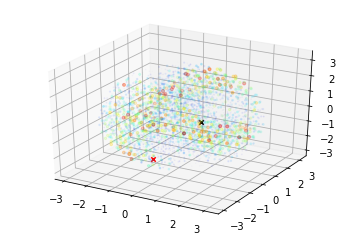

In [96]:
from mpl_toolkits.mplot3d import Axes3D
cmap = plt.get_cmap('jet')
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

scatterSO3(to_np(grid_vertices), to_np(dist_est.flatten()), [to_np(quat)], alpha_max = .5)
pt_gt = quats2Point([pcnn_quat])
ax.scatter(pt_gt[:,0], pt_gt[:,1], pt_gt[:,2], c='K', marker='x')